In [1]:
import matplotlib.pyplot as plt
import numpy as np

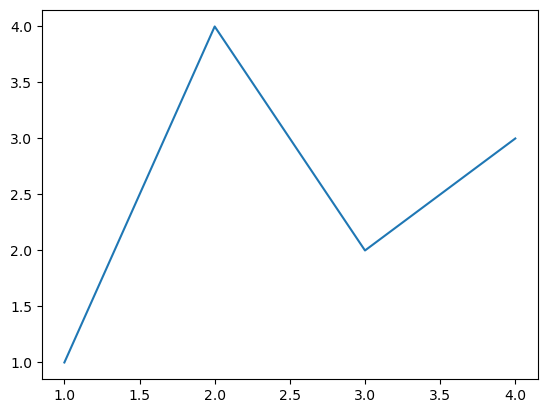

In [2]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])
plt.show()

<Figure size 640x480 with 0 Axes>

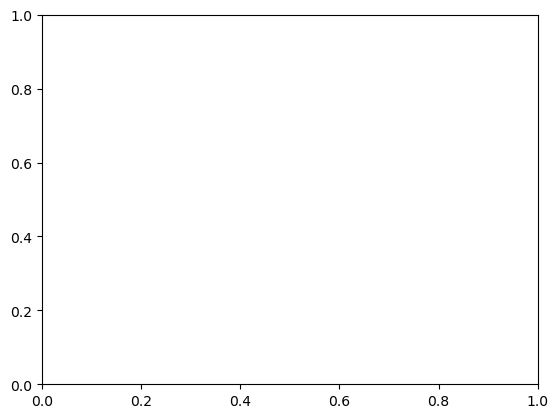

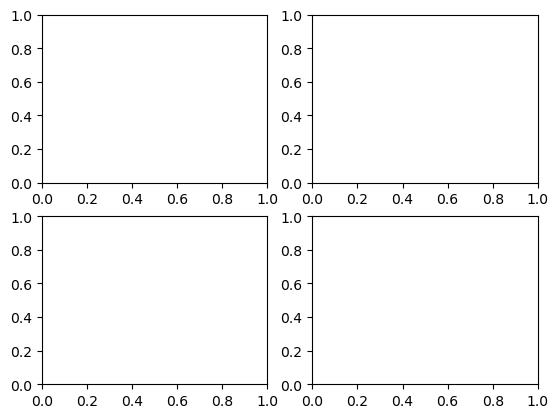

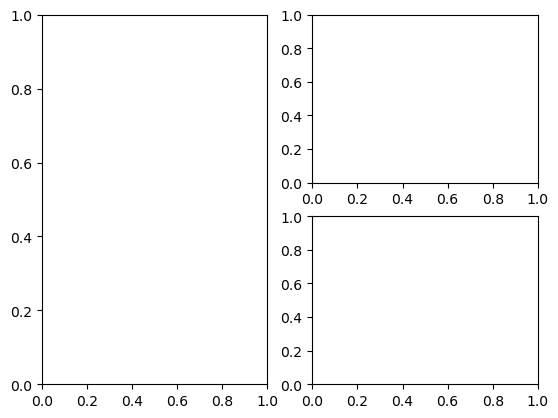

In [3]:
'''The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc.), and even nested subfigures.'''
fig = plt.figure()
fig, ax = plt.subplots()
fig, axs = plt.subplots(2,2)
fig, axs = plt.subplot_mosaic([['left','right_top'],
                              ['left','right_bottom']])


In [4]:
#subplot()and subplot_mosaic are convenience functions that additionally create Axes objects inside the Figure, but you can also manually add Axes later
#An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

#The Axes methods are the primary interface for configuring most parts of your plot (adding data, controlling axis scales and limits, adding labels etc.).
#These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.
#Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

Text(0, 0.5, 'entry b')

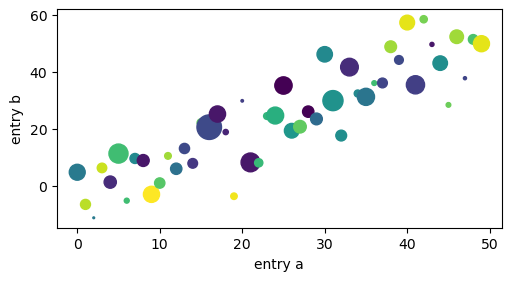

In [5]:
np.random.seed(19680801) #seed the random number generator
data = {'a': np.arange(50),
        'c': np.random.randint(0,50,50),
        'd' : np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5,2.7),layout='constrained')
ax.scatter('a','b',c='c',s='d',data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

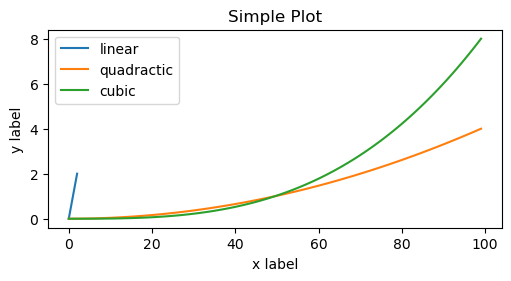

In [6]:
x = np.linspace(0,2,100)
fig, ax = plt.subplots(figsize=(5,2.7),layout = 'constrained')
ax.plot(x,x ,label='linear')
ax.plot(x**2, label='quadractic')
ax.plot(x**3, label= 'cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")
ax.legend()

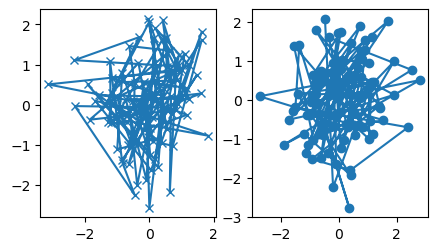

In [7]:
#Making a helper functions
#If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4,100)
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(5,2.7))
my_plotter(ax1, data1, data2, {'marker':'x'})
my_plotter(ax2, data3, data4, {'marker':'o'})

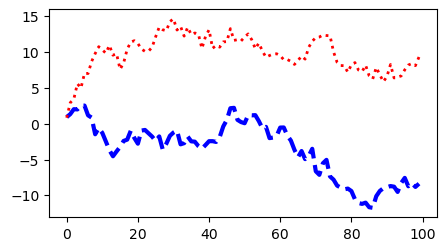

In [8]:
'''Styling Artists
Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.'''
fig, ax = plt.subplots(figsize=(5,2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x,np.cumsum(data2), color = 'red', linewidth=2)
l.set_linestyle(':')

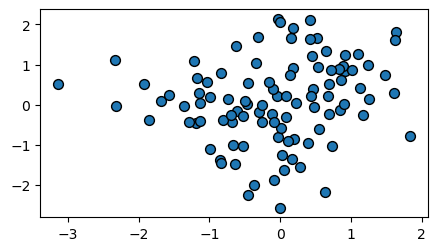

In [9]:
'''Colors
Matplotlib has a very flexible array of colors that are accepted for most Artists; see allowable color definitions for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:'''
fig, ax = plt.subplots(figsize=(5,2.7))
ax.scatter(data1, data2, s=50, facecolor='C0',edgecolor='k')

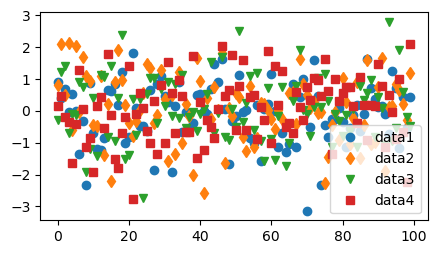

In [10]:
'''Linewidths, linestyles, and markersizes
Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own MarkerStyle (see Marker reference):'''
fig, ax = plt.subplots(figsize=(5,2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

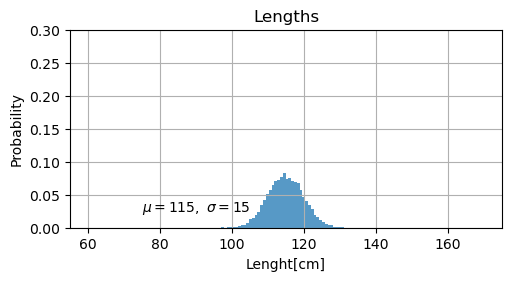

In [11]:
'''Labelling plots
Axes labels and text
set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations (see Text in Matplotlib for more discussion). Text can also be directly added to plots using text:'''
mu, sigma = 115, 5
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5,2.7), layout='constrained')
n, bins, patches = ax.hist(x,50,density=True,facecolor='C0',alpha=0.75)
ax.set_xlabel('Lenght[cm]')
ax.set_ylabel('Probability')
ax.set_title('Lengths')
ax.text(75,.025, r'$\mu=115, \ \sigma=15$')
ax.axis([55,175,0,0.3])
ax.grid(True)
        

'In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced annotation for details. More examples also can be found in Annotating Plots.'

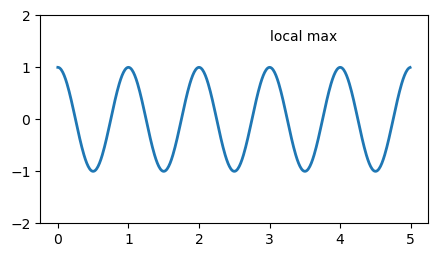

In [12]:
'''Annotations
We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext'''
fig, ax = plt.subplots(figsize=(5,2.7))
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t,s,lw=2)
ax.annotate('local max', xy=(2,1), xytext=(3,1.5))
ax.set_ylim(-2,2)

'''In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced annotation for details. More examples also can be found in Annotating Plots.'''

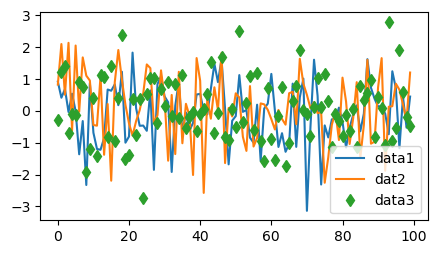

In [13]:
fig, ax = plt.subplots(figsize=(5,2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label = 'dat2')
ax.plot(np.arange(len(data3)), data3, 'd', label = 'data3')
ax.legend()

'The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See Transformations Tutorial.'

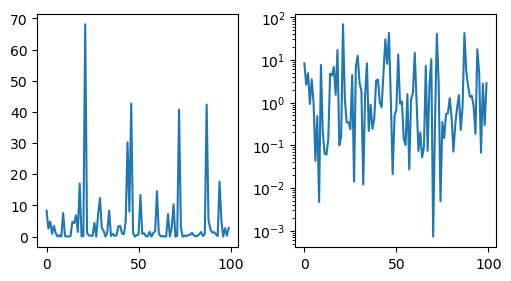

In [14]:
'''Axis scales and ticks
Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.'''
'''Scales
In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy. There are a number of scales (see Scales for other examples). Here we set the scale manually:'''


fig, axs = plt.subplots(1, 2, figsize=(5,2.7), layout = 'constrained')
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata,data)
axs[1].set_yscale('log')
axs[1].plot(xdata,data)


'''The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See Transformations Tutorial.'''

'Different scales can have different locators and formatters; for instance the log-scale above uses LogLocator and LogFormatter. See Tick locators and Tick formatters for other formatters and locators and information for writing your own.'

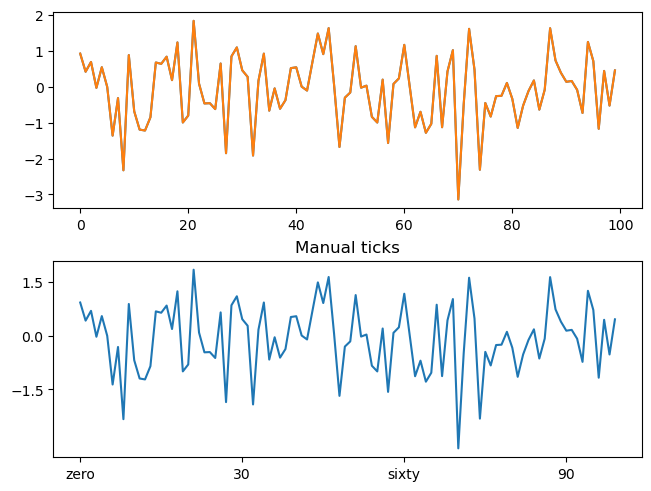

In [15]:
'''Tick locators and formatters
Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks:'''


fig, axs = plt.subplots(2,1, layout= 'constrained')
axs[0].plot(xdata, data1)
axs[0].plot(xdata, data1)

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0,100,30), ['zero','30','sixty','90'])
axs[1].set_yticks([-1.5,0,1.5])
axs[1].set_title('Manual ticks')

'''Different scales can have different locators and formatters; for instance the log-scale above uses LogLocator and LogFormatter. See Tick locators and Tick formatters for other formatters and locators and information for writing your own.'''


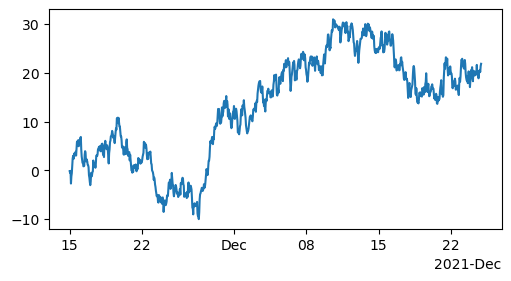

In [16]:
'''Plotting dates and strings
Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:'''

from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

'One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot!'

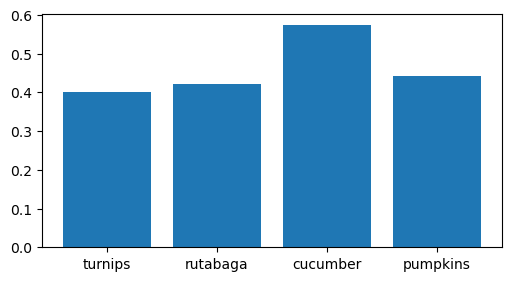

In [17]:
fig, ax = plt.subplots(figsize=(5,2.7),layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber','pumpkins']
ax.bar(categories, np.random.rand(len(categories)))

'''One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot!'''

TypeError: Axes.secondary_xaxis() takes 2 positional arguments but 3 were given

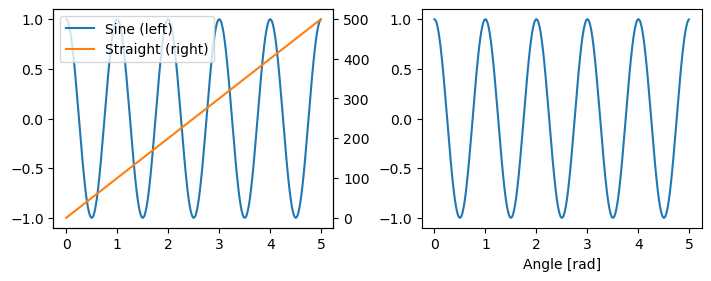

In [20]:
'''Additional Axis objects
Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using twinx to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for twiny). See Plots with different scales for another example.

Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units. '''

fig, (ax1,ax3) = plt.subplots(1,2,figsize=(7,2.7),layout='constrained')
l1, = ax1.plot(t,s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1,l2],['Sine (left)','Straight (right)'])

ax3.plot(t,s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', (np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle[o]')

Text(0.5, 1.0, 'scatter()')

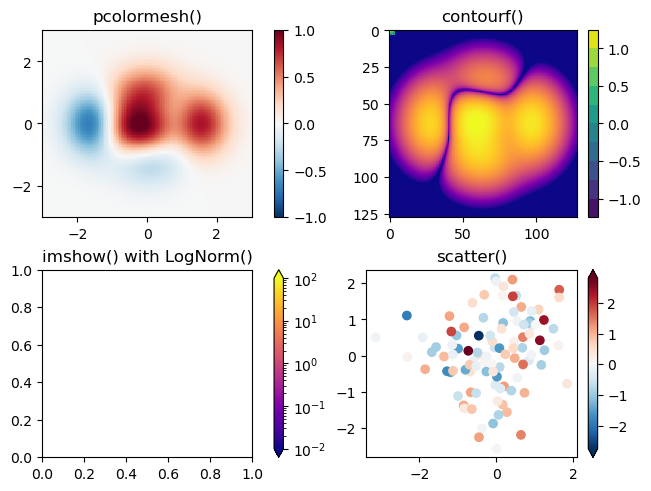

In [21]:
'''Color mapped data
Often we want to have a third dimension in a plot represented by colors in a colormap. Matplotlib has a number of plot types that do this'''

from matplotlib.colors import LogNorm
X, Y = np.meshgrid(np.linspace(-3, 3,128), np.linspace(-3,3,128))
Z = (1- X/2 + X**5 + Y**3) * np.exp(-X**2 -Y**2)

fig, axs = plt.subplots(2,2,layout='constrained')
pc = axs[0,0].pcolormesh(X,Y,Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0,0])
axs[0,0].set_title('pcolormesh()')

co = axs[0,1].contourf(X,Y,Z, levels=np.linspace(-1.25,1.25,11))
fig.colorbar(co, ax=axs[0,1])
axs[0,1].set_title('contourf()')

pc = axs[0,1].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01,vmax=100))
fig.colorbar(pc, ax=axs[1,0], extend= 'both')
axs[1,0].set_title('imshow() with LogNorm()')

pc = axs[1,1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1,1], extend='both')
axs[1,1].set_title('scatter()')

Text(0.5, 1.0, 'right')

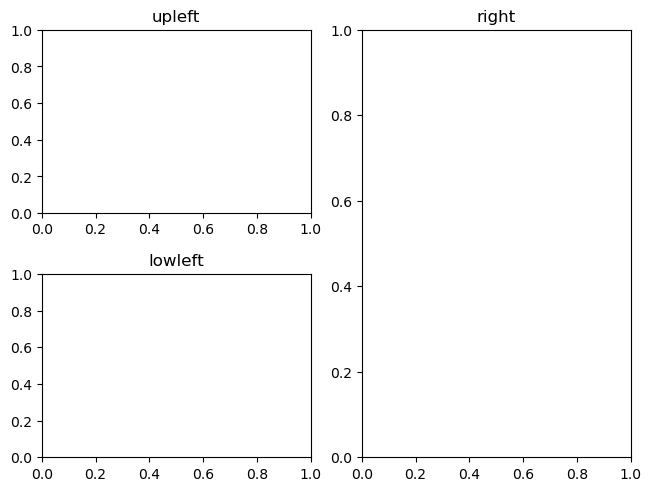

In [22]:
'''Working with multiple Figures and Axes
You can open multiple Figures with multiple calls to fig = plt.figure() or fig2, ax = plt.subplots(). By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is plt.subplots() as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using subplot_mosaic.'''

fig, axd = plt.subplot_mosaic([['upleft','right'],
                             ['lowleft','right']], layout = 'constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')